In [1]:
from pandas import *

In [2]:
df=read_csv("all_tickets.csv")
df.head()

title  \
0                                    NaN   
1                   connection with icon   
2                   work experience user   
3                 requesting for meeting   
4  reset passwords for external accounts   

                                                body  ticket_type  category  \
0  hi since recruiter lead permission approve req...            1         4   
1  icon dear please setup icon per icon engineers...            1         6   
2  work experience user hi work experience studen...            1         5   
3  requesting meeting hi please help follow equip...            1         5   
4  re expire days hi ask help update passwords co...            1         4   

   sub_category1  sub_category2  business_service  urgency  impact  
0              2             21                71        3       4  
1             22              7                26        3       4  
2             13              7                32        3       4  
3             13              7                32        3       4  
4              2             76                 4        3       4

In [3]:
df.ticket_type.value_counts()

ticket_type
1    34621
0    13928
Name: count, dtype: int64

<Axes: xlabel='urgency'>

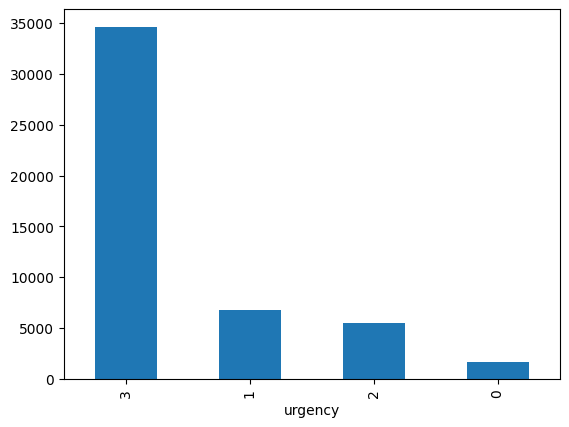

In [4]:
df.urgency.value_counts().plot(kind='bar')

In [6]:
df.shape

(48549, 9)

In [7]:
for i in range(4):
    print(i)
    print(df[df.urgency==i].shape)

0
(1652, 9)
1
(6748, 9)
2
(5528, 9)
3
(34621, 9)


In [8]:
df3=df[df.urgency==3].sample(20000)

In [9]:
df=df[~(df.urgency==3)]

In [10]:
df=concat([df,df3])

In [11]:
df.head(2)

title  \
34621                                          no access   
34622  connection issues on the network with the assi...   

                                                    body  ticket_type  \
34621                      ca pot intra la la va manager            0   
34622  connection issues with assigned address hi fac...            0   

       category  sub_category1  sub_category2  business_service  urgency  \
34621         4             21              1                73        0   
34622         4             21             41                52        1   

       impact  
34621       3  
34622       3

In [12]:
df.drop(columns=['title','ticket_type','category','sub_category1','sub_category2','impact'],inplace=True)

In [13]:
df.drop(labels=34621,inplace=True)

In [14]:
df.head(2)

body  business_service  \
34622  connection issues with assigned address hi fac...                52   
34623  cannot access hi cannot access fallowing link ...                24   

       urgency  
34622        1  
34623        2

In [15]:
df.drop('business_service',axis=1,inplace=True)

In [16]:
df.head()

body  urgency
34622  connection issues with assigned address hi fac...        1
34623  cannot access hi cannot access fallowing link ...        2
34624  re address shown valid dear colleagues remarke...        1
34625  sent tuesday critical alert following alert oc...        2
34626  code spelling mistake hello should discover fo...        2

In [17]:
df.shape

(33927, 2)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33927 entries, 34622 to 14453
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   body     33927 non-null  object
 1   urgency  33927 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 795.2+ KB


In [21]:
df.isnull().sum()

body       0
urgency    0
dtype: int64

In [24]:
indexes=[]
for i in df.index:
    if len(str(df.body[i]))<10:
        indexes.append(i)

In [26]:
df.drop(labels=indexes,inplace=True)

In [28]:
df.head()

body  urgency
34622  connection issues with assigned address hi fac...        1
34623  cannot access hi cannot access fallowing link ...        2
34624  re address shown valid dear colleagues remarke...        1
34625  sent tuesday critical alert following alert oc...        2
34626  code spelling mistake hello should discover fo...        2

In [29]:
text=df.body[34625]

In [30]:
import spacy

In [31]:
nlp=spacy.load("en_core_web_lg")

In [32]:
nlp(text).vector

array([-0.13016231,  0.00822728, -0.10032658,  0.7131131 ,  3.9742215 ,
       -0.4821384 ,  0.46450767,  3.6307232 , -1.1758884 ,  0.04002028,
        5.4141426 ,  1.6012653 , -4.2806807 ,  2.272567  , -0.5494084 ,
        1.3518605 ,  3.0639744 ,  1.2952664 , -1.7284399 , -0.55585456,
       -0.76740533, -0.218275  , -2.4632275 ,  0.4362266 , -2.5088532 ,
       -1.5271678 , -2.2053103 , -1.8216616 , -0.32327297,  1.1945317 ,
        1.0159632 ,  0.47835103, -1.9718771 , -0.4122038 ,  0.72755104,
       -0.8778019 , -0.9886867 ,  0.0488598 ,  3.56312   ,  1.2078028 ,
        0.4001915 , -0.43120497,  0.3158516 ,  0.91563004, -2.6152334 ,
        1.2554991 ,  3.0675266 , -2.6748614 ,  0.47477478, -0.38900977,
        0.9204857 ,  1.2878613 , -0.015921  , -3.397778  , -1.6708949 ,
        1.8829426 , -1.8674068 ,  0.7245463 ,  1.8382143 , -1.4808917 ,
        1.1285981 ,  0.9507661 , -3.2727954 , -1.443201  ,  1.8003547 ,
        2.812814  , -1.6522481 , -1.917819  ,  0.253574  ,  2.92

In [33]:
def process(text):
    return nlp(text).vector

In [34]:
df['preprocessed']=df.body.apply(process)

In [35]:
df.head()

body  urgency  \
34622  connection issues with assigned address hi fac...        1   
34623  cannot access hi cannot access fallowing link ...        2   
34624  re address shown valid dear colleagues remarke...        1   
34625  sent tuesday critical alert following alert oc...        2   
34626  code spelling mistake hello should discover fo...        2   

                                            preprocessed  
34622  [-0.7520911, 1.4273865, -2.612265, -0.79093957...  
34623  [2.4926133, 3.1381001, -3.9104621, -0.7820153,...  
34624  [-0.20055826, 0.3071257, -1.0509928, -0.646565...  
34625  [-0.13016231, 0.008227277, -0.10032658, 0.7131...  
34626  [1.8048236, 1.2155749, -1.0045027, -1.3872913,...

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [37]:
import numpy as np

In [64]:
x=np.stack(df.preprocessed.values)[:,:,np.newaxis]

In [42]:
# x=np.stack(df.preprocessed.values)

In [65]:
y=df.urgency

In [66]:
y

34622    1
34623    2
34624    1
34625    2
34626    2
        ..
33059    3
32690    3
27214    3
6721     3
14453    3
Name: urgency, Length: 33858, dtype: int64

In [67]:
 X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.1,stratify=y)

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

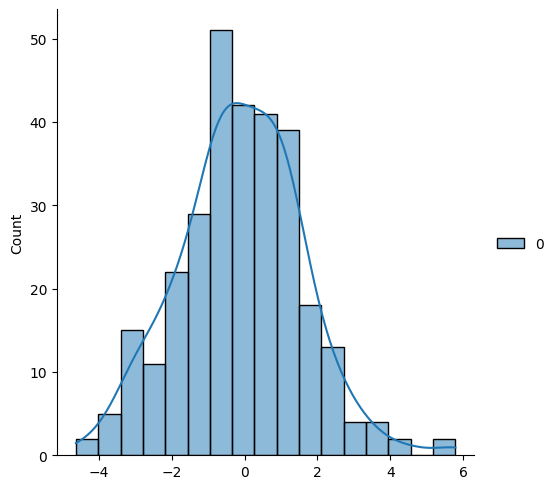

In [69]:
sns.displot(x[0],kde=True)

C:\Users\vivek chouhan\AppData\Local\Temp\ipykernel_16088\3746914587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

KeyboardInterrupt: 

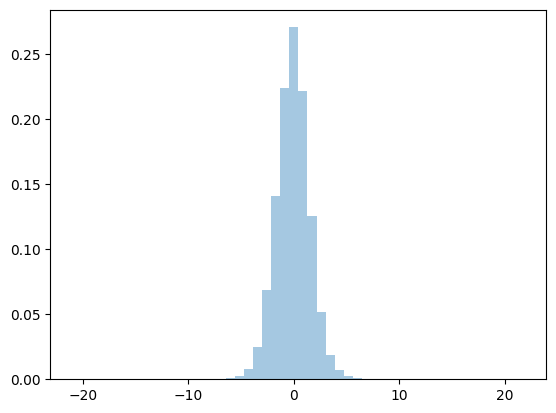

In [53]:
sns.distplot(x)

In [54]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [55]:
gnb.score(X_test,y_test)

0.6280577659888005

In [59]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
knn.score(X_test,y_test)

0.7754199823165341

In [71]:
import tensorflow as tf
from tensorflow import keras

In [75]:
model=keras.Sequential()
model.add(keras.layers.GRU(64,input_shape=(300,1)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(4,activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 4)                 132       
                                                                 
Total params: 31652 (123.64 KB)
Trainable params: 31652 (123.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
953/953 [==============================] - 129s 130ms/step - loss: 0.8799 - accuracy: 0.6292
Epoch 2/5
953/953 [==============================] - 143s 150ms/step - loss: 0.7059 - accuracy: 0.7036
Epoch 3/5
953/953 [==============================] - 136s 142ms/step - loss: 0.6456 - accuracy: 0.7226
Epoch 4/5
953/953 [==============================] - 180s 189ms/step - loss: 0.6161 - accuracy: 0.7325
Epoch 5/5
953/953 [==============================] - 138s 145ms/step - loss: 0.5978 - accuracy: 0.7385


In [73]:
lstm=keras.Sequential()
lstm.add(keras.layers.LSTM(64,input_shape=(300,1)))
lstm.add(keras.layers.Dense(64,activation='relu'))
lstm.add(keras.layers.Dense(32,activation='relu'))
lstm.add(keras.layers.Dense(4,activation='sigmoid'))
lstm.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 23268 (90.89 KB)
Trainable params: 23268 (90.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
history1=lstm.fit(X_train,y_train,epochs=10)

Epoch 1/10
953/953 [==============================] - 167s 168ms/step - loss: 0.8011 - accuracy: 0.6703
Epoch 2/10
953/953 [==============================] - 163s 171ms/step - loss: 0.6498 - accuracy: 0.7202
Epoch 3/10
953/953 [==============================] - 138s 144ms/step - loss: 0.5905 - accuracy: 0.7373
Epoch 4/10
953/953 [==============================] - 145s 153ms/step - loss: 0.5658 - accuracy: 0.7451
Epoch 5/10
953/953 [==============================] - 135s 142ms/step - loss: 0.5554 - accuracy: 0.7495
Epoch 6/10
953/953 [==============================] - 141s 148ms/step - loss: 0.5409 - accuracy: 0.7552
Epoch 7/10
953/953 [==============================] - 176s 185ms/step - loss: 0.5304 - accuracy: 0.7575
Epoch 8/10
953/953 [==============================] - 135s 142ms/step - loss: 0.5210 - accuracy: 0.7615
Epoch 9/10
953/953 [==============================] - 138s 145ms/step - loss: 0.5116 - accuracy: 0.7653
Epoch 10/10
953/953 [==============================] - 130s 137m

In [69]:
gru_history=model.fit(X_train,y_train,epochs=5)

Epoch 1/5
955/955 [==============================] - 125s 131ms/step - loss: 0.5873 - accuracy: 0.7437
Epoch 2/5
955/955 [==============================] - 125s 131ms/step - loss: 0.5776 - accuracy: 0.7444
Epoch 3/5
955/955 [==============================] - 124s 130ms/step - loss: 0.5677 - accuracy: 0.7484
Epoch 4/5
955/955 [==============================] - 126s 132ms/step - loss: 0.5583 - accuracy: 0.7508
Epoch 5/5
955/955 [==============================] - 127s 133ms/step - loss: 0.5491 - accuracy: 0.7545


In [78]:
history2=lstm.fit(X_train,y_train,epochs=10)

Epoch 1/10
953/953 [==============================] - 168s 177ms/step - loss: 0.5052 - accuracy: 0.7662
Epoch 2/10
953/953 [==============================] - 171s 180ms/step - loss: 0.4956 - accuracy: 0.7692
Epoch 3/10
953/953 [==============================] - 154s 161ms/step - loss: 0.4937 - accuracy: 0.7701
Epoch 4/10
953/953 [==============================] - 165s 173ms/step - loss: 0.4871 - accuracy: 0.7741
Epoch 5/10
953/953 [==============================] - 161s 169ms/step - loss: 0.4795 - accuracy: 0.7751
Epoch 6/10
953/953 [==============================] - 139s 146ms/step - loss: 0.4722 - accuracy: 0.7768
Epoch 7/10
953/953 [==============================] - 142s 149ms/step - loss: 0.4698 - accuracy: 0.7790
Epoch 8/10
953/953 [==============================] - 127s 133ms/step - loss: 0.4672 - accuracy: 0.7792
Epoch 9/10
953/953 [==============================] - 128s 135ms/step - loss: 0.4641 - accuracy: 0.7802
Epoch 10/10
953/953 [==============================] - 143s 150m

In [99]:
history3=lstm.fit(X_train,y_train,epochs=15)

Epoch 1/15
953/953 [==============================] - 132s 138ms/step - loss: 0.4503 - accuracy: 0.7867
Epoch 2/15
953/953 [==============================] - 128s 135ms/step - loss: 0.4514 - accuracy: 0.7859
Epoch 3/15
953/953 [==============================] - 129s 135ms/step - loss: 0.4500 - accuracy: 0.7839
Epoch 4/15
953/953 [==============================] - 127s 134ms/step - loss: 0.4410 - accuracy: 0.7897
Epoch 5/15
953/953 [==============================] - 126s 132ms/step - loss: 0.4395 - accuracy: 0.7876
Epoch 6/15
953/953 [==============================] - 127s 133ms/step - loss: 0.4382 - accuracy: 0.7888
Epoch 7/15
953/953 [==============================] - 127s 134ms/step - loss: 0.4366 - accuracy: 0.7917
Epoch 8/15
953/953 [==============================] - 128s 135ms/step - loss: 0.4329 - accuracy: 0.7898
Epoch 9/15
953/953 [==============================] - 128s 135ms/step - loss: 0.4274 - accuracy: 0.7950
Epoch 10/15
953/953 [==============================] - 129s 136m

In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [80]:
vectorizer=CountVectorizer()
x_vectorized=vectorizer.fit_transform(df.body.values)

In [92]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x_vectorized,y,test_size=0.15)

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
mnb=MultinomialNB()
mnb.fit(x_tr,y_tr)

MultinomialNB()

In [91]:
mnb.score(x_ts,y_ts)

0.8070486316203977

In [95]:
tfidf=TfidfVectorizer()
x_tfidf=tfidf.fit_transform(df.body.values)

In [96]:
x_tfidf_tr,x_tfidf_ts,y_tfidf_tr,y_tfidf_ts=train_test_split(x_tfidf,y,test_size=0.15)

In [97]:
tfidf_mnb=MultinomialNB()
tfidf_mnb.fit(x_tfidf_tr,y_tfidf_tr)

MultinomialNB()

In [98]:
tfidf_mnb.score(x_tfidf_ts,y_tfidf_ts)

0.8054735184091356

In [100]:
lstm.evaluate(X_test,y_test)

106/106 [==============================] - 7s 56ms/step - loss: 0.5004 - accuracy: 0.7874


[0.5004132390022278, 0.7873597145080566]

In [113]:
text="Our office printer has abruptly stopped working. This is severely affecting our operations; urgent assistance is required to resolve the issue promptly. "

In [102]:
doc=nlp(text)
text=" ".join([token.lemma_ for token in doc if not token.is_stop])

In [107]:
vector=nlp(text).vector.reshape(1,-1,1)

In [109]:
result =np.argmax(lstm.predict(vector)[0])

1/1 [==============================] - 0s 47ms/step


In [110]:
result

3

In [111]:
lstm.save("support_ticket_model.keras")

In [112]:
def predict(text):
    doc=nlp(text)
    text=" ".join([token.lemma_ for token in doc if not token.is_stop])
    vector=nlp(text).vector.reshape(1,-1,1)
    result =np.argmax(lstm.predict(vector)[0])
    return result

In [114]:
predict(text)

1/1 [==============================] - 0s 46ms/step


3

In [115]:
predict('Our [specific system/software] has encountered a critical error ([Error Code]), disrupting operations and impeding vital tasks. Internal troubleshooting has failed to resolve the issue. Urgently seeking your immediate assistance. ')

1/1 [==============================] - 0s 47ms/step


3

In [116]:
predict('We are experiencing a minor issue with [specific system/software] related to [brief description]. While it does not severely impact operations, we would appreciate your assistance in resolving it at your earliest convenience.')

1/1 [==============================] - 0s 46ms/step


3